analysis of Yale summer internship data

In [1]:
%matplotlib
import numpy as np
import pandas as pd

Using matplotlib backend: Qt5Agg


In [2]:
file_path = "Summer_2019_Peer_List.xlsx"

In [3]:
df = pd.read_excel(file_path)

In [4]:
df.head()

,Unnamed: 0,last_name,first_name,email,major,class_year,job_type,project_name,city,country,state,employer,industry,job_role,interview,work_info,work_culture
0,0,Sung,Christopher,christopher.sung@yale.edu,History,Undergraduate: Junior,"Internship, paid",NaN,"Washington, D.C., and Annapolis",NaN,"District of Columbia,Maryland",(Maryland) Governor's Summer Internship Program,"Government (including local, state, federal an...","Research (Policy, Academic, Literary)",You submit an application to the Governor's Su...,I worked in the Governor's Office with Secreta...,The portions of the Program that were operated...
1,1,Model,Max,max.model@yale.edu,Computer Science & Mathematics,Undergraduate: Junior,"Internship, paid",NaN,Winston-Salem,NaN,North Carolina,100watt,Technology,Programming/Software Development,I applied by sending in only my resume (no cov...,I worked the entire summer on an app called “P...,The culture at 100watt is one that you dream f...
2,2,Zhou,Huahao,huahao.zhou@yale.edu,Computer Science,Undergraduate: Junior,"Internship, paid",NaN,Winston-Salem,NaN,North Carolina,100watt,Technology,Engineering,went through interview with all the people in ...,Built a mobile app. Learned React Native.,Very friendly and supportive.
3,3,Baker,Morgan,morgan.baker@yale.edu,Women'sGender&SexualityStudies,Undergraduate: Junior,"Internship, unpaid",NaN,New Haven,NaN,Connecticut,108 Monkeys,Community Organizations Advocacy/Social Services,Writing / Editing,"Almost no interview process, really. I reached...",I worked on a number of support tasks for the ...,I worked remotely or by myself in the office m...
4,4,Williams,Marina,marina.williams@yale.edu,Psychology,Undergraduate: Senior,"Internship, paid",NaN,Los Angeles,NaN,California,20th Century Fox/Disney,Entertainment/Film/Television,"Entertainment (Film/TV, Theatre, Music)",NaN,NaN,NaN


In [64]:
df.shape

(1708, 16)

In [65]:
df.columns

Index(['Last Name', 'First Name', 'Email', 'Major',
       'Class Year (After Position)', 'Type of Position',
       'Field Research Project Title (if relevant)', 'City',
       'Country (if outside the U.S.)', 'U.S. State or Territory', 'Employer',
       'Employer: Industry', 'Employer: Function (Role)',
       'Briefly describe the interview process for this position',
       'Describe (1) the projects you worked on and (2) how much interaction you had with your supervisor during the summer',
       'Describe the work atmosphere and culture of the organization'],
      dtype='object')

In [66]:
#df.dtypes
# rename columns
df2 = df.copy()

In [67]:
df2.rename(columns={
    df2.columns[0]: "last_name", 
    df2.columns[1]: "first_name",
    df2.columns[2]: "email",
    df2.columns[3]: "major",
    df2.columns[4]: "class_year",
    df2.columns[5]: "job_type",
    df2.columns[6]: "project_name",
    df2.columns[7]: "city",
    df2.columns[8]: "country",
    df2.columns[9]: "state",
    df2.columns[10]: "employer",
    df2.columns[11]: "industry",
    df2.columns[12]: "job_role",
    df2.columns[13]: "interview",
    df2.columns[14]: "work_info",
    df2.columns[15]: "work_culture"
}, inplace = True)

In [68]:
df2.fillna('', inplace=True)

In [69]:
df2.head()

,last_name,first_name,email,major,class_year,job_type,project_name,city,country,state,employer,industry,job_role,interview,work_info,work_culture
0,Sung,Christopher,christopher.sung@yale.edu,History,Undergraduate: Junior,"Internship, paid",,"Washington, D.C., and Annapolis",,"District of Columbia,Maryland",(Maryland) Governor's Summer Internship Program,"Government (including local, state, federal an...","Research (Policy, Academic, Literary)",You submit an application to the Governor's Su...,I worked in the Governor's Office with Secreta...,The portions of the Program that were operated...
1,Model,Max,max.model@yale.edu,Computer Science & Mathematics,Undergraduate: Junior,"Internship, paid",,Winston-Salem,,North Carolina,100watt,Technology,Programming/Software Development,I applied by sending in only my resume (no cov...,I worked the entire summer on an app called “P...,The culture at 100watt is one that you dream f...
2,Zhou,Huahao,huahao.zhou@yale.edu,Computer Science,Undergraduate: Junior,"Internship, paid",,Winston-Salem,,North Carolina,100watt,Technology,Engineering,went through interview with all the people in ...,Built a mobile app. Learned React Native.,Very friendly and supportive.
3,Baker,Morgan,morgan.baker@yale.edu,Women'sGender&SexualityStudies,Undergraduate: Junior,"Internship, unpaid",,New Haven,,Connecticut,108 Monkeys,Community Organizations Advocacy/Social Services,Writing / Editing,"Almost no interview process, really. I reached...",I worked on a number of support tasks for the ...,I worked remotely or by myself in the office m...
4,Williams,Marina,marina.williams@yale.edu,Psychology,Undergraduate: Senior,"Internship, paid",,Los Angeles,,California,20th Century Fox/Disney,Entertainment/Film/Television,"Entertainment (Film/TV, Theatre, Music)",,,


### top 10 majors

In [83]:
major = pd.value_counts(df2.major)

In [84]:
major.head(10)

Undeclared                        368
Political Science                 136
Economics                         122
History                            77
Molecular,Cellular,Dev Biology     72
Computer Science                   64
Psychology                         53
English                            50
Global Affairs                     43
Ethics,Politics & Economics        41
Name: major, dtype: int64

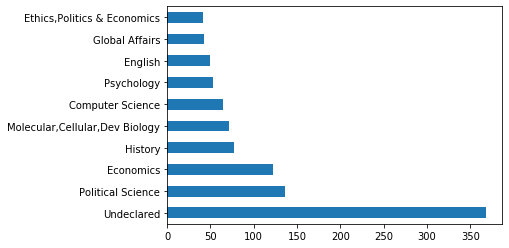

In [85]:
major[:10].plot(kind='barh')

### class distribution

In [86]:
class_year = pd.value_counts(df2.class_year)

class_year.head()

Undergraduate: Junior       618
Undergraduate: Senior       600
Undergraduate: Sophomore    488
-                             2
Name: class_year, dtype: int64

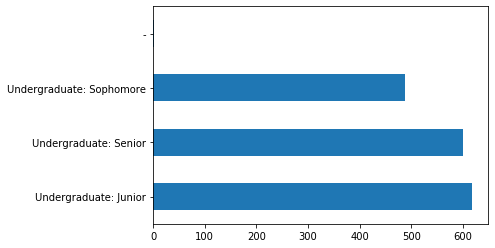

In [87]:
class_year.plot(kind='barh')

### top 10 job types

In [88]:
job_type = pd.value_counts(df2.job_type)

job_type.head(10)

Internship, paid                            659
Internship, unpaid                          364
Research in a laboratory                    232
Paid job (e.g. camp counselor)              198
Field research                               79
Other                                        77
Volunteer work                               46
Performance (theater, music, dance, etc)     29
Research in a library                        24
Name: job_type, dtype: int64

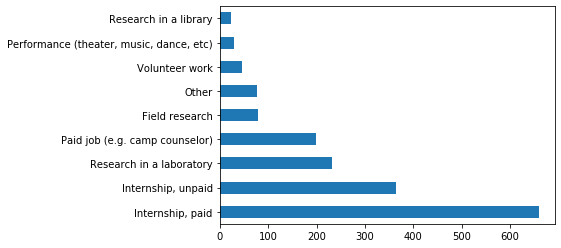

In [89]:
job_type[:10].plot(kind='barh')

### top 20 Employers

In [90]:
employer = pd.value_counts(df2.employer)

employer.head(20)

                                  209
Yale University                    47
Facebook                           17
Google                             11
Yale School of Medicine             8
Microsoft                           7
Yale Summer Session                 6
Yale Young Global Scholars          6
Boston Consulting Group             5
Yale                                5
Morgan Stanley                      5
Massachusetts General Hospital      4
Camp Kesem                          4
The Boston Consulting Group         4
Altman Vilandrie & Company          4
Pamir Law Group                     4
Yale Young African Scholars         4
Bain & Company                      4
Bank of America Merrill Lynch       4
Goldman Sachs                       4
Name: employer, dtype: int64

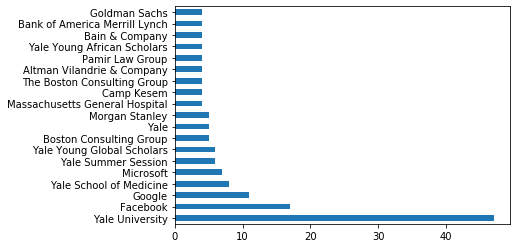

In [94]:
employer[1:20].plot(kind='barh')

### top 20 Industries

In [75]:
# replace "-" with ""
df2['industry'] = df2['industry'].apply(lambda x: "" if x.strip() == "-" else x)

In [92]:
industry = pd.value_counts(df2.industry)

industry.head(20)

                                                                     438
Academia/Education  (including University research positions)        189
Finance/Insurance/Real Estate                                        164
Technology                                                           121
Government (including local, state, federal and military service)    105
Healthcare/Medical/Pharmaceutical                                     91
Law/Legal Services                                                    76
Community Organizations Advocacy/Social Services                      68
Consulting                                                            65
Publishing/Media/Journalism                                           45
Environment                                                           33
Entertainment/Film/Television                                         31
Communications/Marketing/Advertising / PR                             29
Think Tank                                         

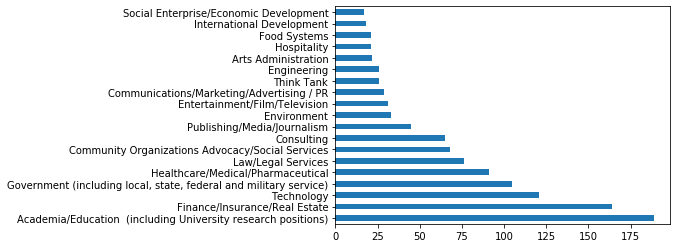

In [95]:
industry[1:20].plot(kind='barh')

### top 20 Job Roles

In [77]:
# replace "-" with ""
df2['job_role'] = df2['job_role'].apply(lambda x: "" if x.strip() == "-" else x)

In [96]:
job_role = pd.value_counts(df2.job_role)

job_role.head(20)

                                          439
Research (Policy, Academic, Literary)     152
Finance                                   144
Teaching/Curriculum Development            97
Programming/Software Development           73
Consulting                                 69
Engineering                                68
Law                                        62
Office Administrative/Support Services     54
Operations                                 51
Research: Laboratory                       51
Marketing/Product Management               51
Writing / Editing                          48
Health Services/Healthcare                 43
Project Management                         37
Advocacy/Campaigning/Lobbying              31
Outdoor Education                          27
Business Development                       26
Sales                                      23
Advertising/Public Relations               20
Name: job_role, dtype: int64

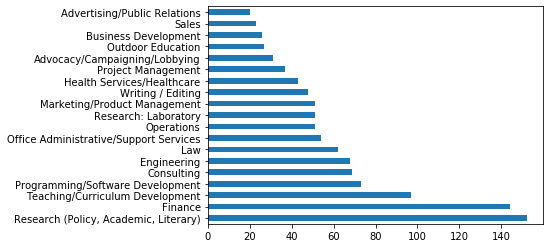

In [97]:
job_role[1:20].plot(kind='barh')

In [98]:
df2.to_excel("Summer_2019_Peer_List.xlsx")